In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
file_path = "../data/Visa_Predection_Dataset.csv"
df_visa = pd.read_csv(file_path)
df_visa

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [9]:
# continent method value counts

df_visa['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [10]:
df_visa['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [15]:
# Out of all asian applicants, how many of them got visa
# out of all europe applicants, how many of them got visa

con1 = df_visa['continent'] == "Asia"
con2 = df_visa['case_status'] == "Certified"
df_new = df_visa[con1&con2]

In [20]:
con1 = df_visa['continent'] == "Europe"
con2 = df_visa['case_status'] == "Certified"
df_new = df_visa[con1&con2]

In [43]:
# How many applicants from specific continents got certified or denied

list_of_continents = df_visa['continent'].unique()
list_of_certified_counts = []
list_of_denied_counts = []
for i in list_of_continents:
    con1 = df_visa['continent']==i
    con2 = df_visa['case_status']=="Certified"
    con3 = df_visa['case_status'] == "Denied"
    cert = df_visa[con1&con2]
    denied = df_visa[con1&con3]
    list_of_certified_counts.append(len(cert))
    list_of_denied_counts.append(len(denied))
print("List of Visa Status Certified Count \n" , list_of__certified_counts)
print("List of Visa Status denied Count \n" , list_of_denied_counts)

List of Visa Status Certified Count 
 [11012, 397, 2037, 2957, 493, 122]
List of Visa Status denied Count 
 [5849, 154, 1255, 775, 359, 70]


In [45]:
df_visa_status = pd.DataFrame(
    zip(list_of_continents, list_of_certified_counts, list_of_denied_counts),
    columns=["continent", "certified_count", "denied_count"],
).set_index('continent')

In [46]:
df_visa_status

,certified_count,denied_count
continent,,
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


<Axes: xlabel='continent'>

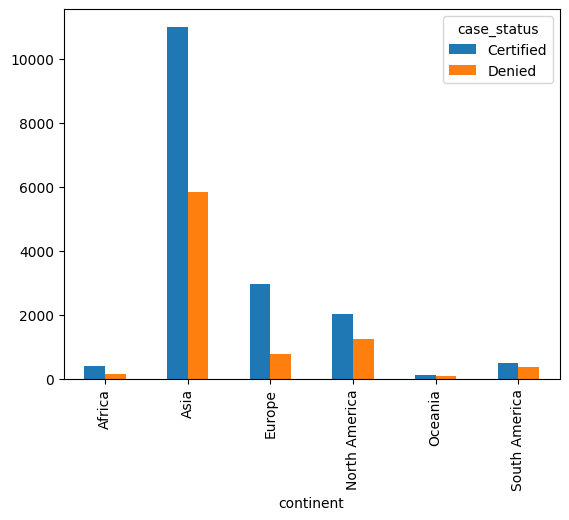

In [47]:
col1 = df_visa['continent']
col2 = df_visa['case_status']
result1 = pd.crosstab(col1, col2)
result1.plot(kind = "bar")

In [51]:
# continent 
# education
# case status

col1 = df_visa["continent"] #index
col2 = df_visa["case_status"]
col3 = df_visa["education_of_employee"]
col = [col2, col3] # values
result2 = pd.crosstab(col1, col)
result2

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

<Axes: xlabel='continent'>

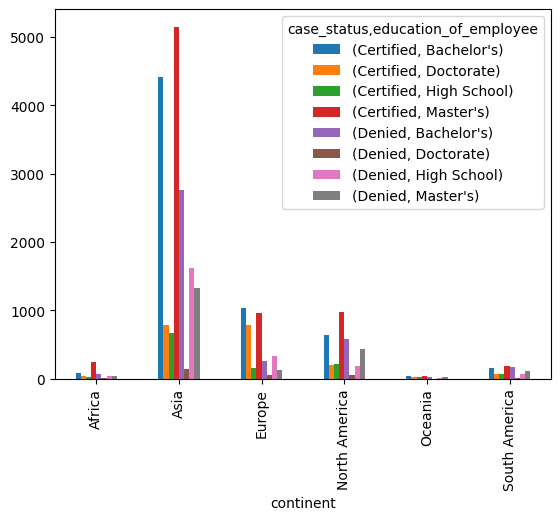

In [52]:
result2.plot(kind="bar")

#### Numerical vs Numerical
##### $plt.scatter$

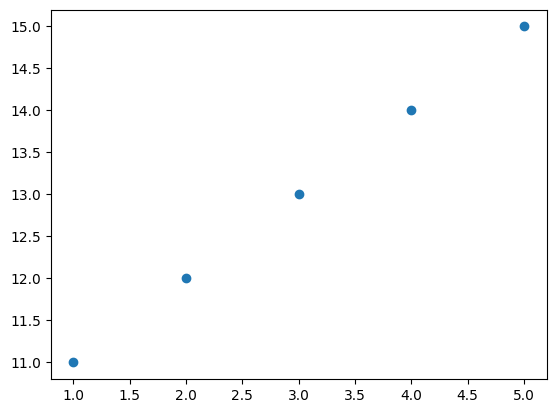

In [54]:
x=[1,2,3,4,5]
y=[11, 12, 13, 14, 15]
# (1,11), (2,12), (3,13), (4,14), (5, 15)
plt.scatter(x,y)

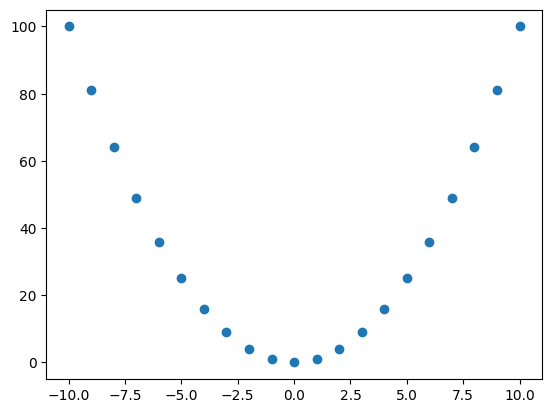

In [60]:
x = [i for i in range(-10,11)]
y = [i*i for i in x]

plt.scatter(x,y)

- scatter plots are used for numerical analysis
- scatter plots provides an idea, both variables are related or not related
- Positive relation
    - Increase in the curve
- Negative relation
    - Decrease in the curve
- No relation
    - Neither increase
    - Nor decrease 


In [ ]:
col1 = df_visa['education_of_employee']
col2 = df_visa['prevailing_wage']
plt.scatter(col1, col2)

In [73]:
data_types = dict(df_visa.dtypes)
cat = [i for i in data_types if data_types[i] == "O"]
num = [i for i in data_types if data_types[i] != "O"]
num

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

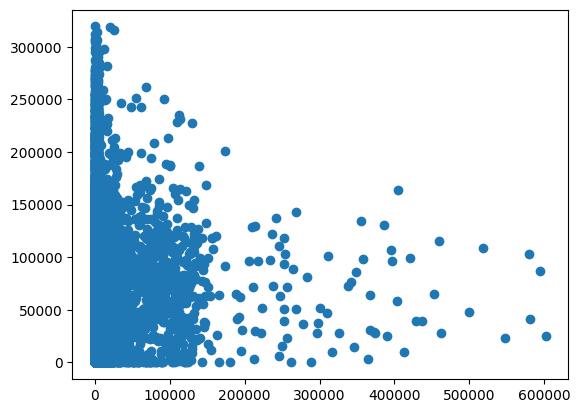

In [75]:
plt.scatter(df_visa['no_of_employees'], df_visa['prevailing_wage']) # No relation

$Covariance$

How many numerical columns: 3
|                   | no_of_employees | year          | age           |
|-------------------|------------------|---------------|---------------|
| no_of_employees   | var              | covar         | covar         |
| year              | covar            | var           | covar         |
| age               | covar            | covar         | var           |




$correlation-coefficient$

- denoted by r
- r ranges from -1 to 1
- positive relation range = (0,1]
- negative relation range = [-1,0)
- no relation = 0

![Correlation Coefficient](https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg)

In [85]:
df_visa.corr(numeric_only=True) # applicable for only numerical column

# in the data frame we have both categorical and numerical column
# correlation is applicable for only numerical column
# explicitly mention numeric = True

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


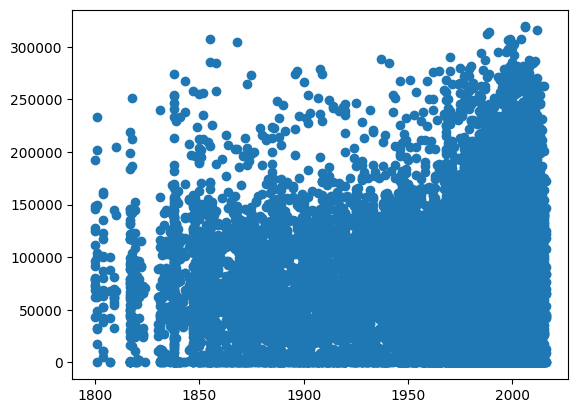

In [90]:
plt.scatter(df_visa['yr_of_estab'], df_visa['prevailing_wage'])

In [91]:
print("Hello World")

Hello World


#### Heatmap



In [98]:
# corr funciton
corr_data = df_visa.corr(numeric_only=True)

<Axes: >

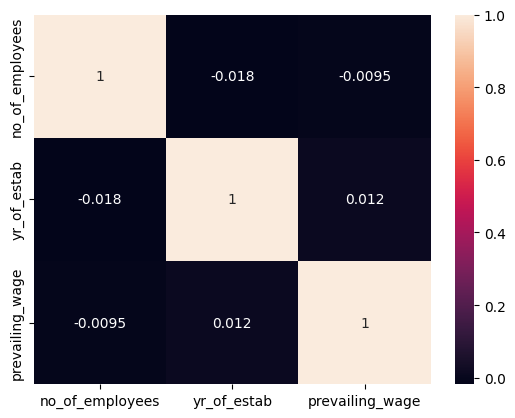

In [100]:
# matrix
# showing values in a matrix
# showing values in a picture: Heatmap
sns.heatmap(corr_data, annot=True)


In [119]:
df_wine = pd.read_csv("../data/WineQT.csv")
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [110]:
# correlation of a wine dataset
# hard to analyze the correlation because of alot of numeric columns
corr_data = df_wine.corr() # since all the columns are numeric here
corr_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


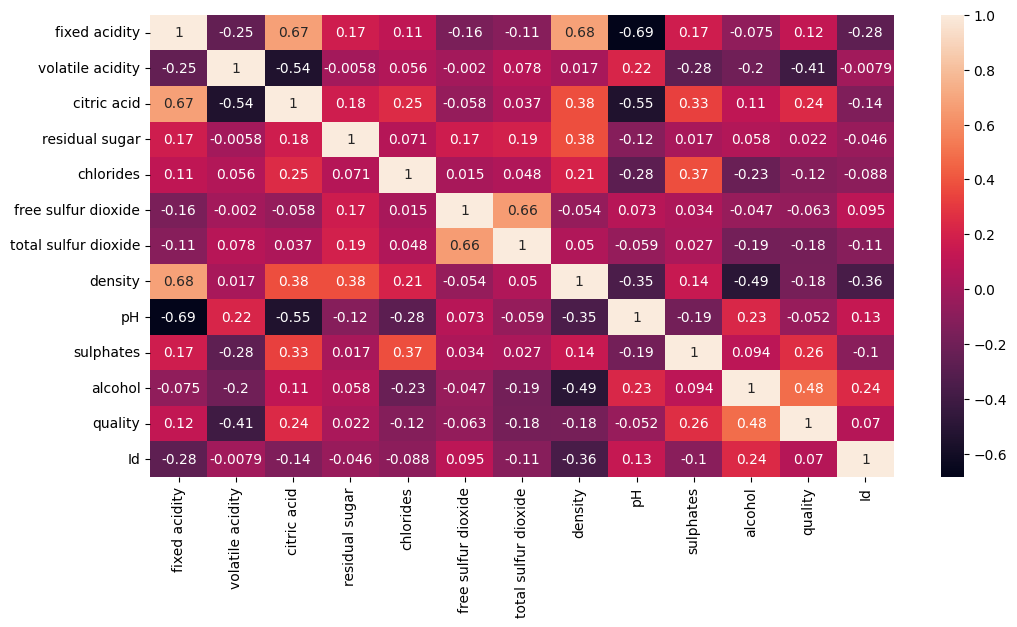

In [115]:
# Heatmap of a wine dataset
plt.figure(figsize=(12,6))
sns.heatmap(corr_data, annot=True)
plt.show()

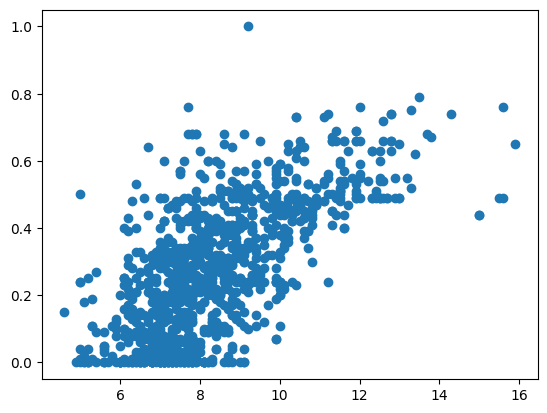

In [122]:
plt.scatter(df_wine['fixed acidity'], df_wine['citric acid'] )

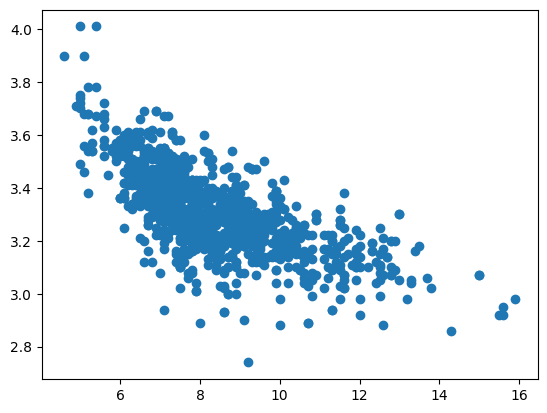

In [123]:
plt.scatter(df_wine['fixed acidity'], df_wine['pH'] )